### System Equation

$$
\begin{eqnarray}
z'(t) &=& b(t) \\
b'(t) &=& g\left(1 - \frac{z(t)}{z_t}\right)
\end{eqnarray}
$$

### Discretized System Equation

Using Newton's method:

$$
\begin{eqnarray}
z_{n+1} &=& z(t) + \Delta t b_n \\
b_{n+1} &=& b_n + \Delta t \left(g - \frac{g}{z_t} z_n\right)
\end{eqnarray}
$$

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [2]:
# creating the time grid
T = 100.0  # length of the time-interval
dt = 0.02  # time-step size
N = int(T / dt) + 1  # number of time steps
t = np.linspace(0.0, T, num=N)  # time grid

In [4]:
# initial conditions
z0 = 100.0  # altitude
b0 = 10.0 # upward velocity from gust
zt = 100.0  # trim altitude
g = 9.81  # gravitational acceleration

# initial value of the numerical solution
u = np.array([z0, b0])

# array to store the solution
z = np.zeros(N)
z[0] = z0

In [5]:
# temporal integration using Euler's method
for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

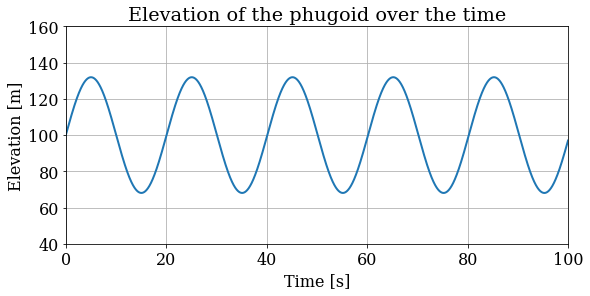

In [23]:
# font settings
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# plot the solution
pyplot.figure(figsize=(9.0, 4.0))  # size of the figure
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2)

### Exact Solution

$$
\begin{equation}
z(t) = b_0 \sqrt{\frac{z_t}{g}} \sin \left(\sqrt{\frac{g}{z_t}} t \right) + (z_0-z_t) \cos \left(\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation}
$$

In [12]:
z_exact = (b0 * np.sqrt(zt / g) * np.sin(np.sqrt(g / zt) * t) +
           (z0 - zt) * np.cos(np.sqrt(g / zt) * t) + zt)

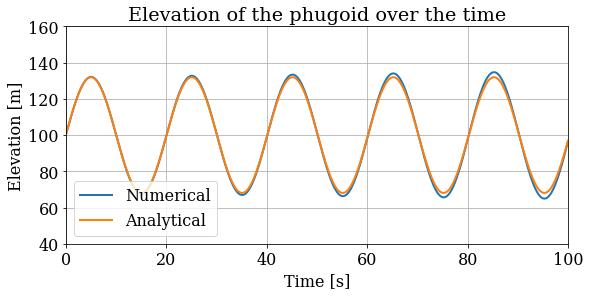

In [13]:
# plot both the numerical solution and the exact solution
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t, z, label='Numerical', color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical', color='C1', linestyle='-', linewidth=2)
pyplot.legend()

### Convergence

In [15]:
# set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    
    # set the initial conditions.
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    
    # temporal integration using Euler's method.
    for n in range(1, N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]
        
    z_values.append(z)

In [21]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error between the numerical and exact solutions in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * np.sum(np.abs(z - z_exact))
    
    return error

In [22]:
# create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    
    # compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
               (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)
    
    # calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

In [ ]:
# plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Error')
pyplot.grid()
pyplot.loglog(dt_values, error_values, color='C0', linestyle='--', marker='o')
pyplot.axis('equal')